In [1]:
from platform import python_version

print(python_version())

3.9.7


In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
path ='E:\Data\storage'

In [3]:
df = pd.read_csv('E:\Data\data_final.csv')
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,8,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,8,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,8,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,8,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,8,S1
...,...,...,...,...,...,...,...,...,...
517951,-0.468750,0.859375,0.093750,0.983382,1.68,33.99,0.000000,0,S15
517952,-0.609375,0.890625,0.265625,1.111354,-16.38,33.99,0.000000,0,S15
517953,-0.468750,0.531250,-0.562500,0.904632,13.43,33.99,0.000000,0,S15
517954,-0.375000,0.406250,-0.843750,1.008751,-5.89,33.99,0.000000,0,S15


In [4]:
df.describe()

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity
count,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000,517956.000000
mean,-0.523311,0.100442,0.356042,1.036891,0.042157,33.068502,0.388140,3.835615
std,0.350997,0.644760,0.405099,0.196428,83.879339,1.812486,1.607082,2.979353
min,-2.000000,-2.000000,-2.000000,0.034939,-1581.680000,26.270000,0.000000,0.000000
25%,-0.796875,-0.343750,0.109375,0.982389,-31.350000,31.810000,0.000000,0.000000
50%,-0.515625,-0.015625,0.343750,1.006085,2.730000,33.500000,0.000000,5.000000
75%,-0.281250,0.640625,0.687500,1.050251,33.870000,34.340000,0.000000,6.000000
max,1.984375,1.984375,1.984375,3.464102,1806.390000,36.450000,17.872803,8.000000


In [6]:
df = df[df.Activity != 0]
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,8,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,8,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,8,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,8,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,8,S1
...,...,...,...,...,...,...,...,...,...
377619,-0.906250,-0.140625,0.421875,1.009477,-7.01,31.21,0.000000,1,S15
377620,-0.906250,-0.140625,0.421875,1.009477,18.29,31.21,0.000000,1,S15
377621,-0.921875,-0.156250,0.421875,1.025790,-1.42,31.21,0.000000,1,S15
377622,-0.921875,-0.156250,0.421875,1.025790,-6.51,31.23,0.000000,1,S15


In [7]:
Unique = df['Activity'].unique()
Unique

array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [8]:
df['Activity'].replace([1,5,6,8], 0, inplace=True)
df['Activity'].replace([2,3,4,7], 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
df

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345,0,S1
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625,0,S1
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472,0,S1
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161,0,S1
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694,0,S1
...,...,...,...,...,...,...,...,...,...
377619,-0.906250,-0.140625,0.421875,1.009477,-7.01,31.21,0.000000,0,S15
377620,-0.906250,-0.140625,0.421875,1.009477,18.29,31.21,0.000000,0,S15
377621,-0.921875,-0.156250,0.421875,1.025790,-1.42,31.21,0.000000,0,S15
377622,-0.921875,-0.156250,0.421875,1.025790,-6.51,31.23,0.000000,0,S15


In [9]:
Unique = df['Activity'].unique()
Unique

array([0, 1], dtype=int64)

In [10]:
df[df['Activity']==1]

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA,Activity,Subject
68020,-0.078125,-0.734375,0.703125,1.019703,-38.80,34.59,3.131150,1,S1
68021,-0.250000,-0.500000,0.671875,0.874023,-23.34,34.61,3.123463,1,S1
68022,-0.796875,-0.500000,0.515625,1.072790,-12.05,34.61,3.117057,1,S1
68023,-1.171875,0.109375,0.296875,1.213832,-11.86,34.61,3.109370,1,S1
68024,-0.875000,0.953125,0.343750,1.338744,-17.03,34.61,3.086309,1,S1
...,...,...,...,...,...,...,...,...,...
341039,-0.078125,-0.218750,0.031250,0.234375,18.45,30.91,0.000000,1,S15
341040,-1.312500,-0.156250,-0.031250,1.322137,-7.77,30.91,0.000000,1,S15
341041,-0.703125,-0.218750,-0.015625,0.736533,6.91,30.91,0.000000,1,S15
341042,-2.000000,0.187500,-0.406250,2.049438,-21.97,30.91,0.000000,1,S15


In [12]:
remove = ["Subject", "Activity"]
features = [column for column in list(df.columns) if column not in remove]
features

['wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'Magnitude',
 'wrist_BVP',
 'wrist_TEMP',
 'wrist_EDA']

In [13]:
#Train-test split
# X = df[features].values
X = df[features]
y = df.Activity

In [14]:
X

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA
0,-0.671875,0.500000,-0.031250,0.838089,52.95,33.47,5.035345
1,-0.843750,0.703125,0.125000,1.105407,107.33,33.49,5.036625
2,-0.437500,0.734375,0.328125,0.915630,166.30,33.49,4.999472
3,-0.562500,0.515625,0.250000,0.802979,-165.69,33.49,4.966161
4,-0.546875,0.578125,0.250000,0.834147,-65.76,33.49,4.936694
...,...,...,...,...,...,...,...
377619,-0.906250,-0.140625,0.421875,1.009477,-7.01,31.21,0.000000
377620,-0.906250,-0.140625,0.421875,1.009477,18.29,31.21,0.000000
377621,-0.921875,-0.156250,0.421875,1.025790,-1.42,31.21,0.000000
377622,-0.921875,-0.156250,0.421875,1.025790,-6.51,31.23,0.000000


In [15]:
X.shape

(377624, 7)

# important Features

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [17]:
print(model.feature_importances_)
# max value is good , that means has impact as a feature

[0.0572965  0.46133378 0.06847563 0.17559857 0.03548211 0.18760889
 0.01420452]


# plot graph of features importance for better visualization
imprtnt_features = pd.Series(model.feature_importances_, index=X.columns)
imprtnt_features.nlargest(10).plot(kind = 'barh')
plt.show()

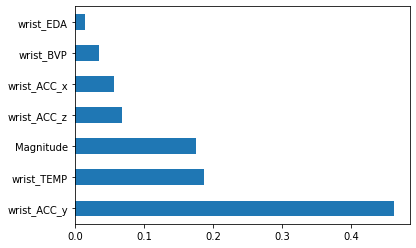

In [18]:
# plot graph of features importance for better visualization
imprtnt_features = pd.Series(model.feature_importances_, index=X.columns)
imprtnt_features.nlargest(12).plot(kind = 'barh')
plt.show()

# Train, Test, Classification

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify = y)

In [20]:
X_train.head()

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA
177234,-0.968750,-0.046875,0.171875,0.984995,-45.83,33.91,0.0
27753,0.453125,-0.781250,0.390625,0.984003,-91.44,34.34,0.0
95084,-0.843750,1.515625,0.140625,1.740347,-25.66,32.81,0.0
133920,-0.296875,-0.843750,0.421875,0.988953,-15.39,34.00,0.0
322210,-0.109375,-1.000000,0.343750,1.063074,-6.31,32.71,0.0


In [21]:
X_test.shape

(75525, 7)

In [22]:
X_test.head()

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,Magnitude,wrist_BVP,wrist_TEMP,wrist_EDA
38199,-0.718750,-0.203125,0.687500,1.015144,2.63,31.83,0.000000
108001,-0.703125,-0.406250,0.593750,1.005964,-100.86,33.33,3.488599
63039,-0.515625,-0.078125,0.843750,0.991911,-47.88,34.97,0.000000
121261,-0.828125,-0.078125,0.578125,1.012977,45.51,35.77,0.000000
261113,0.296875,-0.421875,0.921875,1.056393,82.29,34.93,0.000000


In [19]:
X_test.to_csv(f'{path}/test_data.csv')

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
rf = RandomForestClassifier(n_estimators = 65, random_state = 42)
rf.fit(X_train, y_train)
# predictions = rf.predict(X_test)
y_pred = rf.predict(X_test)

In [56]:
# score = rf.score(y_pred,y_test)
# print(score)

In [80]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
rf_acc = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",rf_acc)

Accuracy: 0.9495001655081099


In [81]:
# print("Precision:",metrics.precision_score(y_test, y_pred))
rf_Pre = metrics.precision_score(y_test, y_pred)
print("Precision:",rf_Pre)

Precision: 0.9136611013744119


In [82]:
# print("Recall:",metrics.recall_score(y_test, y_pred))
rf_Recall= metrics.recall_score(y_test, y_pred)
print(rf_Recall)

0.9107208532548731


In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.9379539215040475


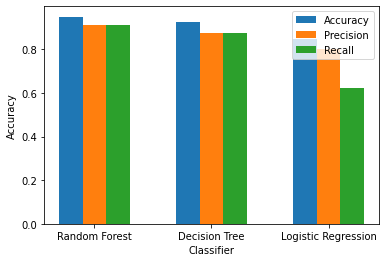

In [122]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Random Forest', 'Decision Tree', 'Logistic Regression']
Accuracy = [0.9495001655081099,0.9269910625620655,0.8465541211519364]
Precision = [0.9136611013744119,0.8730129559864008,0.8021599810111559]
Recall = [0.9107208532548731,0.873574843692534,0.621460095623391]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Accuracy, 0.2, label = 'Accuracy')
plt.bar(X_axis, Precision, 0.2, label = 'Precision')
plt.bar(X_axis + 0.2, Recall, 0.2, label = 'Recall')

plt.xticks(X_axis, X)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
# plt.title("Number of Students in each group")
# plt.legend(['Accuracy','Precision'],loc='upper left')
plt.legend(loc='upper right')

plt.show()

In [60]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# # print(accuracy_score(X_test, y_test))
# # from sklearn import metrics
# precision = metrics.precision_score(X_test, y_test)
# recall = metrics.recall_score(X_test, y_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[51901  1872]
 [ 1942 19810]]


In [38]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions)
# np.set_printoptions(precision=2)
# plt.figure(figsize = (10,5))
# plot_confusion_matrix(cm, classes=[0, 1], normalize=True)
# # plot_confusion_matrix(cm,normalize=True)

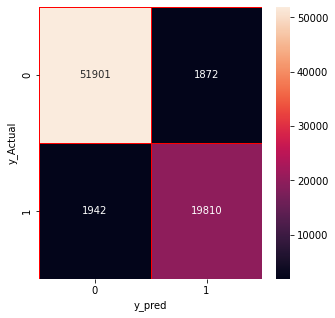

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_Actual")
plt.show()

Text(0.5, 257.44, 'Predicted label')

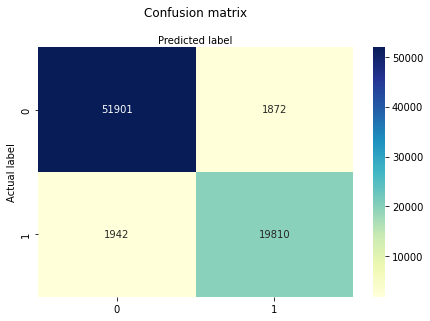

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_model_ppg.pkl', 'wb')

# dump information to that file
pickle.dump(rf,file)

# Decision Tree Classifier

In [32]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:

score = clf.score(X_test, y_test)
print(score)

0.9269910625620655


In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9269910625620655


In [69]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8730129559864008


In [70]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.873574843692534


# Logistic Regression

In [72]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
score = logreg.score(X_test, y_test)
print(score)

0.8465541211519364


In [73]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.846832174776564


In [74]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8021599810111559


In [75]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.621460095623391


In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.7797293597340357
